# ALIF
Adaptive Leaky Integrate-and-Fire Neuron Model

$τ .(\frac{du}{dt}) = -(U(t) - U_{rest}) − Rw + R.I(t)$

$τ_w.(\frac{dW}{dt})= a(u − u_{rest}) − w + b.τ_w ∑ δ( t − t_f )$


if $U(t) == Threshold$  
then Fire + Reset $( U = U_{reset} )$

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Define the ALIF class

In [137]:
class ALIF:

  #constants
  U_rest = -0.065
  U_reset = -0.070
  thresh = -0.050 
  totalTime = 0.1
  dt = 0.00002
  time = np.arange(0, totalTime + dt, dt)
  tau_w = 0.00001                          
  a = 0.01
  b = 250

  def __init__(self, I_init, I_type, R, C):
    self.I_init = I_init
    self.I_type = I_type
    self.R = R
    self.tau = C*R

  #define 5 current functions and save their values
  def current(self, I_init):  
    I0 = np.zeros(len(self.time))
    I0[:] = I_init
    if(self.I_type == 1): return I0;

    I1 = []
    I2 = []
    I3 = []
    I4 = []
    I5 = []
    
    for i in range(0, len(self.time)):
        
        I = ((math.sin(i/100)+1)*I_init )     #c*sin(t/100)+c
        I1.append(I)

        I = ((math.cos(i/100)+1)*I_init)    #c*cos(t/100)+c
        I2.append(I)

        I = ((math.floor(i/500)+1)*I_init)    #c*[t/500]+c
        I3.append(I)

        I = ((math.exp(i/2000)+1)*I_init)   #c*e^(t/2000)+c
        I4.append(I)

        I = ((math.log(i+1)+1)*I_init)   #c*log(t+1)+c
        I5.append(I)
    
    I = [I0,I1,I2,I3,I4,I5]
        
    return I[self.I_type-1]

  #simulate the ALIF model with selected I
  def simulation(self, I_init):
    U = np.empty(len(self.time))
    U[0] = self.U_rest

    I = self.current(I_init)
    W = np.zeros(len(self.time))
    spikes = 0 
    t = self.time[0]
    ts = 0
    
    for i in range(1, len(self.time)):

        weight =W[i-1] * self.R * bool(spikes)
        U[i] = (((self.U_rest - U[i-1]) + I[i] * self.R - weight) * self.dt) / self.tau + U[i-1]
        
        if( I[i] > 0):    
            W[i] = ((self.a * (U[i-1] - self.U_rest) - W[i-1] + self.b * self.tau_w * spikes) * self.dt) / self.tau_w + W[i-1]
        if U[i] > self.thresh:
            U[i-1] = 0.04
            U[i] = self.U_reset
            ts = self.time[i]-t
            t = self.time[i]
            spikes += 1
            
    return U , ts ,I

  #plot I_t and U_t
  def plot(self):
    U , ts , I= self.simulation(self.I_init)
    thresh = np.zeros(len(self.time))
    U_rest = np.zeros(len(self.time))
    thresh[0:5001] = self.thresh
    U_rest[0:5001] = self.U_rest

    fig ,ax = plt.subplots(2,figsize=(20,15))
    
    ax[0].plot(self.time, I, label="Applied Current:I", color='orange')
    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Current [A]")
    ax[0].legend()
    ax[1].plot(self.time, thresh, 'r--', label="threshold")
    ax[1].plot(self.time, U_rest, 'g--', label="U rest")
    ax[1].plot(self.time, U, label="Potential:U")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Potential [V]")
    ax[1].legend()
  
  #plot F_I curve
  def FI_curve(self):
    
    F = []
    I_inp= np.arange(0,10,0.01)
    for i in I_inp:
        U,ts,I = self.simulation(i) 
        F.append(1/(ts+0.001)) if ts>0 else F.append(ts)

    plt.figure(figsize=(10,10))
    plt.plot(I_inp,F,'r--',label="F-I curve")
    plt.legend(loc="lower right")

    plt.ylabel("f (1/T)")
    plt.xlabel("I")


## F_I curve plot 

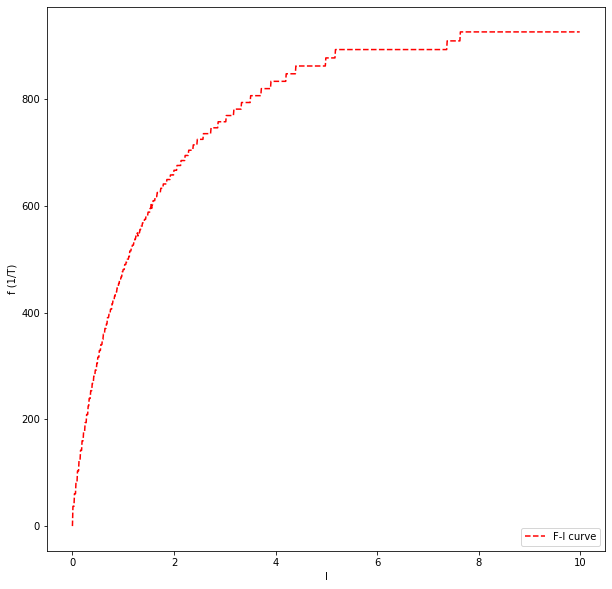

In [143]:
ALIF_model = ALIF(0.01, 1, 6, 0.005)
ALIF_model.FI_curve()

## 1 - ALIF model with constant current

$U_{rest} = -0.65$

$U_{reset} = -0.70$

$U_{thereshold} = -0.50$

$I(t) = 0.01 $

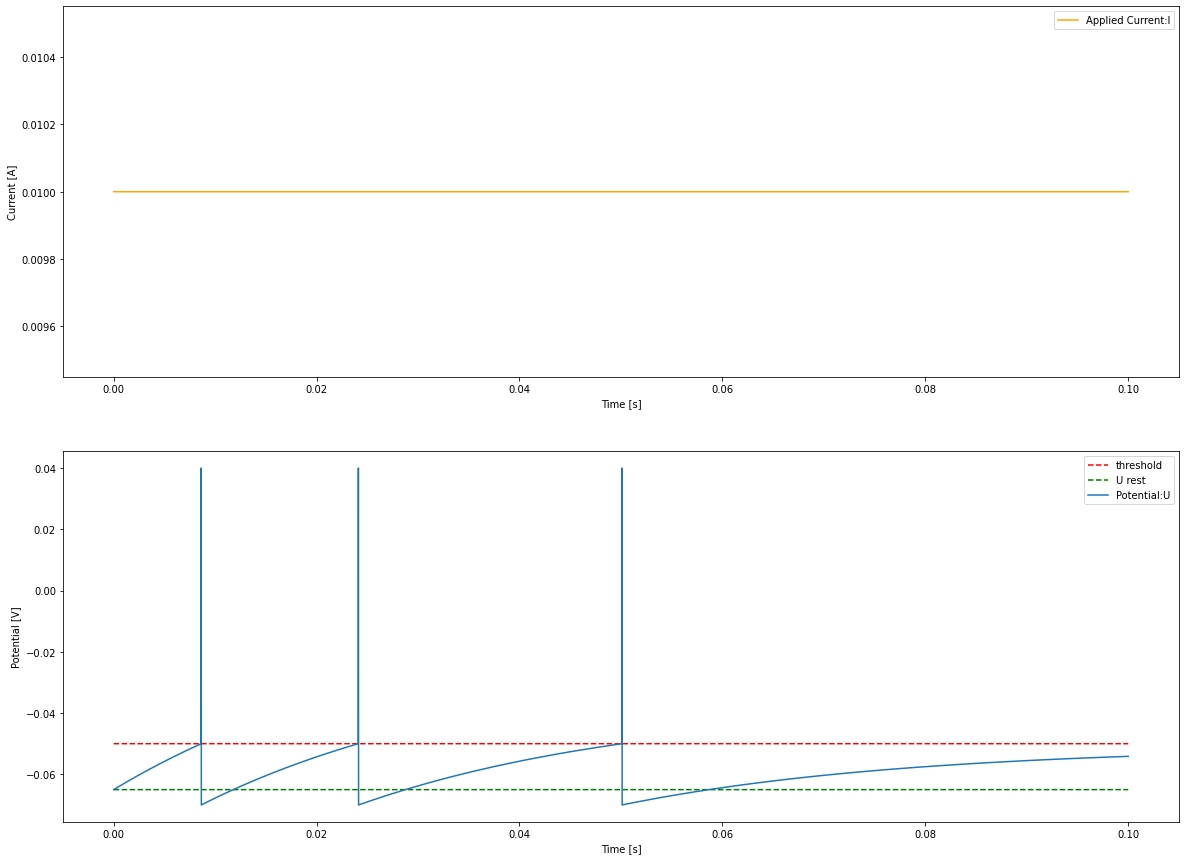

In [138]:
ALIF_model = ALIF(0.01, 1, 6, 0.005)
ALIF_model.plot()

## 2 - ALIF model with logarithm function current

$U_{rest} = -0.65$

$U_{reset} = -0.70$

$U_{thereshold} = -0.50$

$I(t) = 0.005*log((1+t)) + 0.005 $

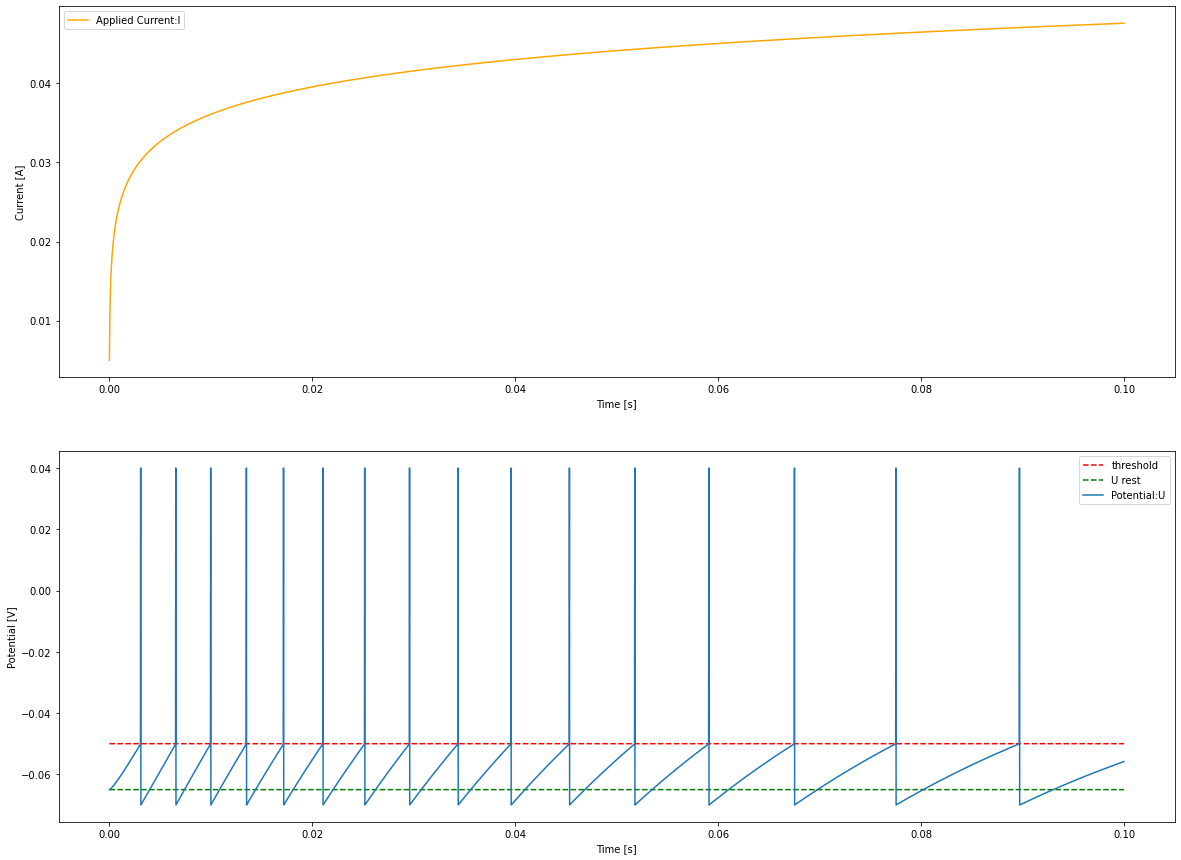

In [142]:
ALIF_model = ALIF(0.005, 6, 6, 0.005)
ALIF_model.plot()

## 3 - ALIF model with sine wave current

$U_{rest} = -0.65$

$U_{reset} = -0.70$

$U_{thereshold} = -0.50$

$I(t) = 0.02*sin(t/100)+0.02$

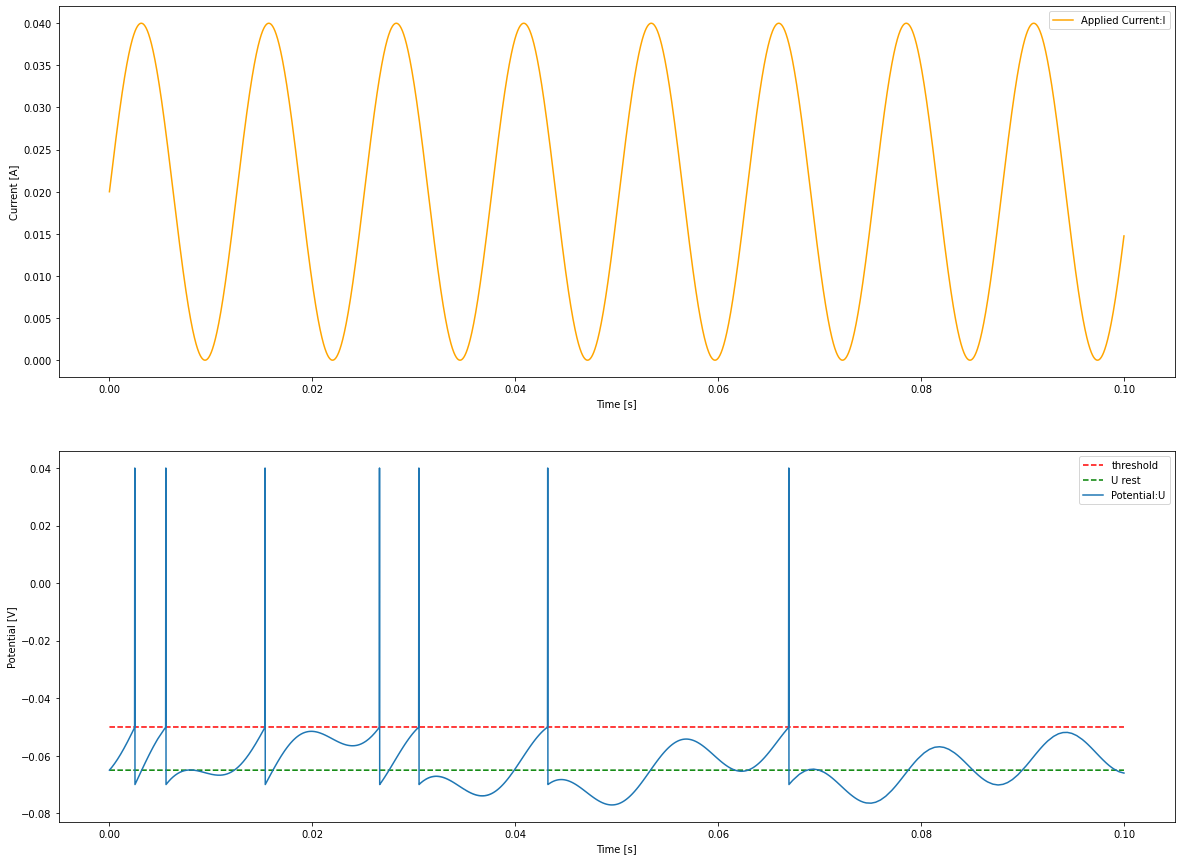

In [144]:
ALIF_model = ALIF(0.02, 2, 6, 0.005)
ALIF_model.plot()

### 3-1 - Change tau

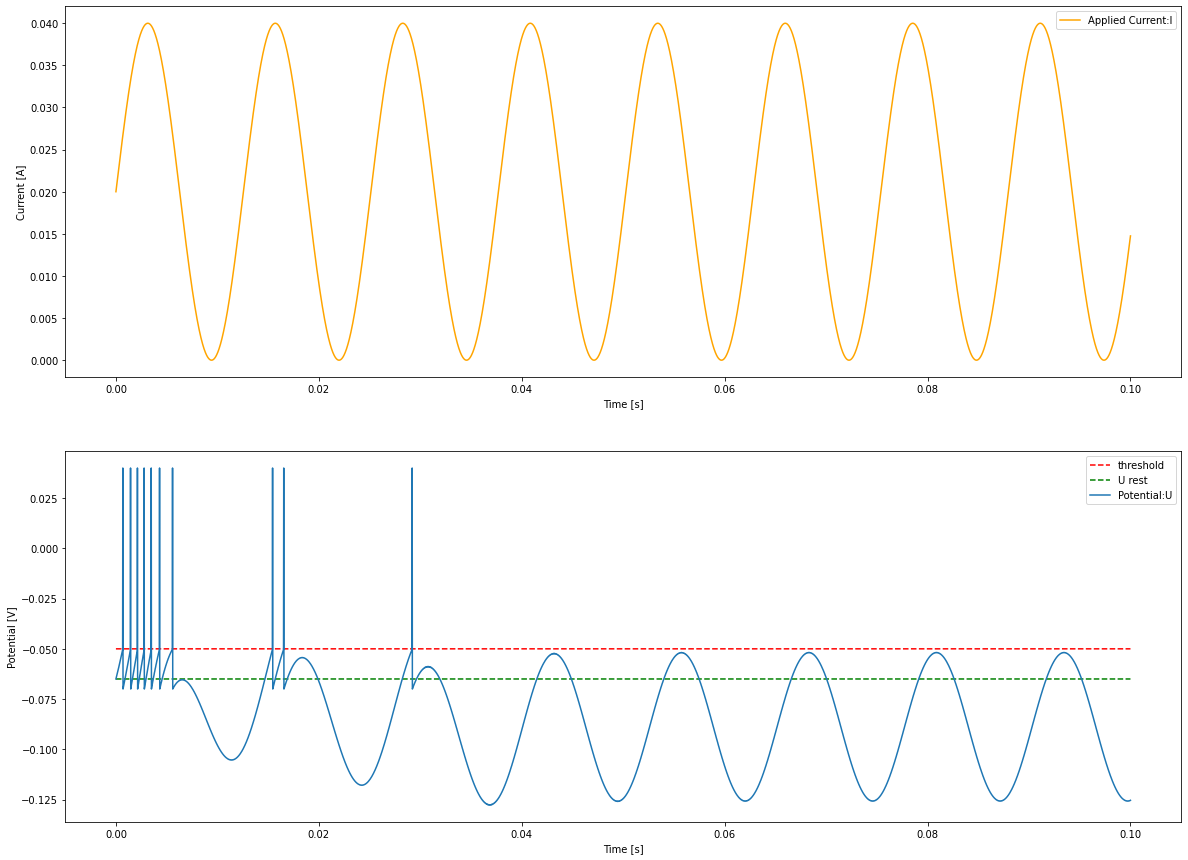

In [145]:
ALIF_model = ALIF(0.02, 2, 5, 0.001)
ALIF_model.plot()

## 4 - ALIF model with cosine wave current

$U_{rest} = -0.65$

$U_{reset} = -0.70$

$U_{thereshold} = -0.50$

$I(t) = 0.02*cos(t/100)+0.02$

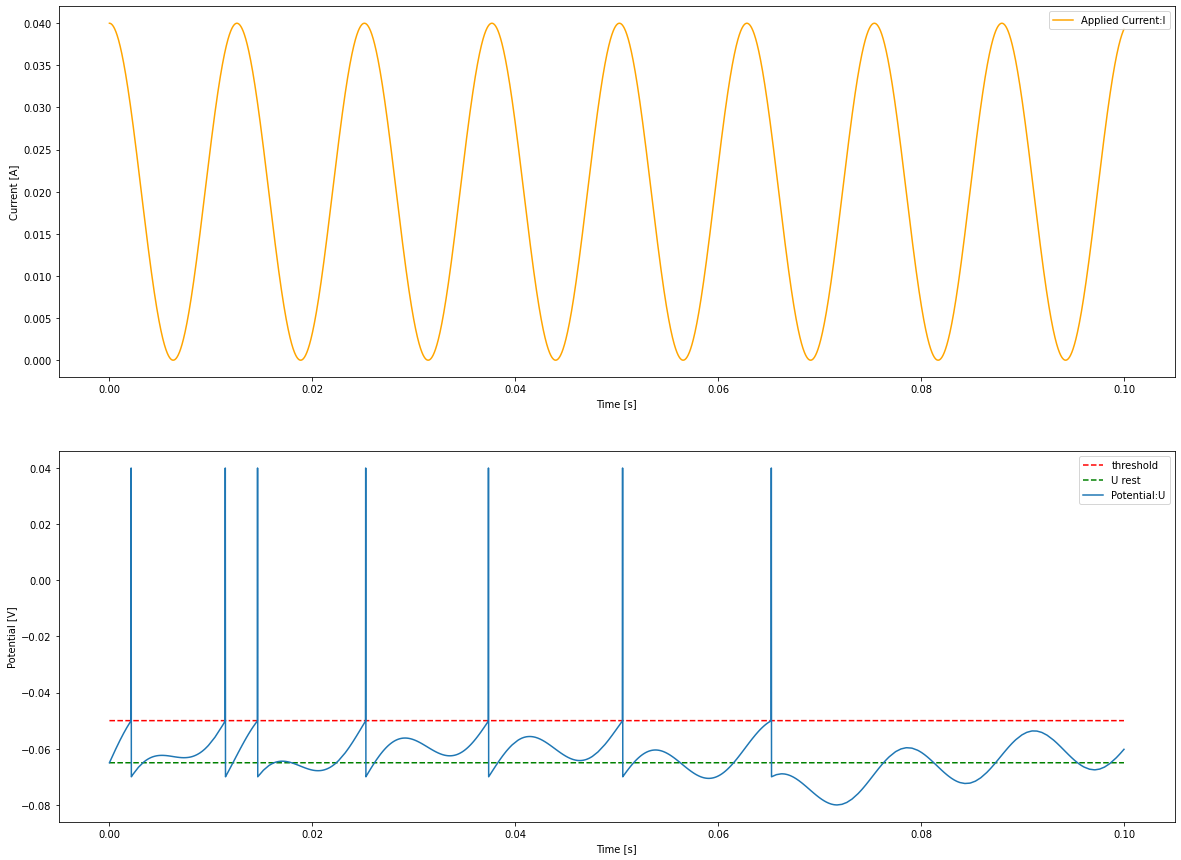

In [146]:
ALIF_model = ALIF(0.02, 3, 6, 0.005)
ALIF_model.plot()

## 5 - ALIF model with step function current

$U_{rest} = -0.65$

$U_{reset} = -0.70$

$U_{thereshold} = -0.50$

$I(t) = 0.005*[t/500]+0.005$

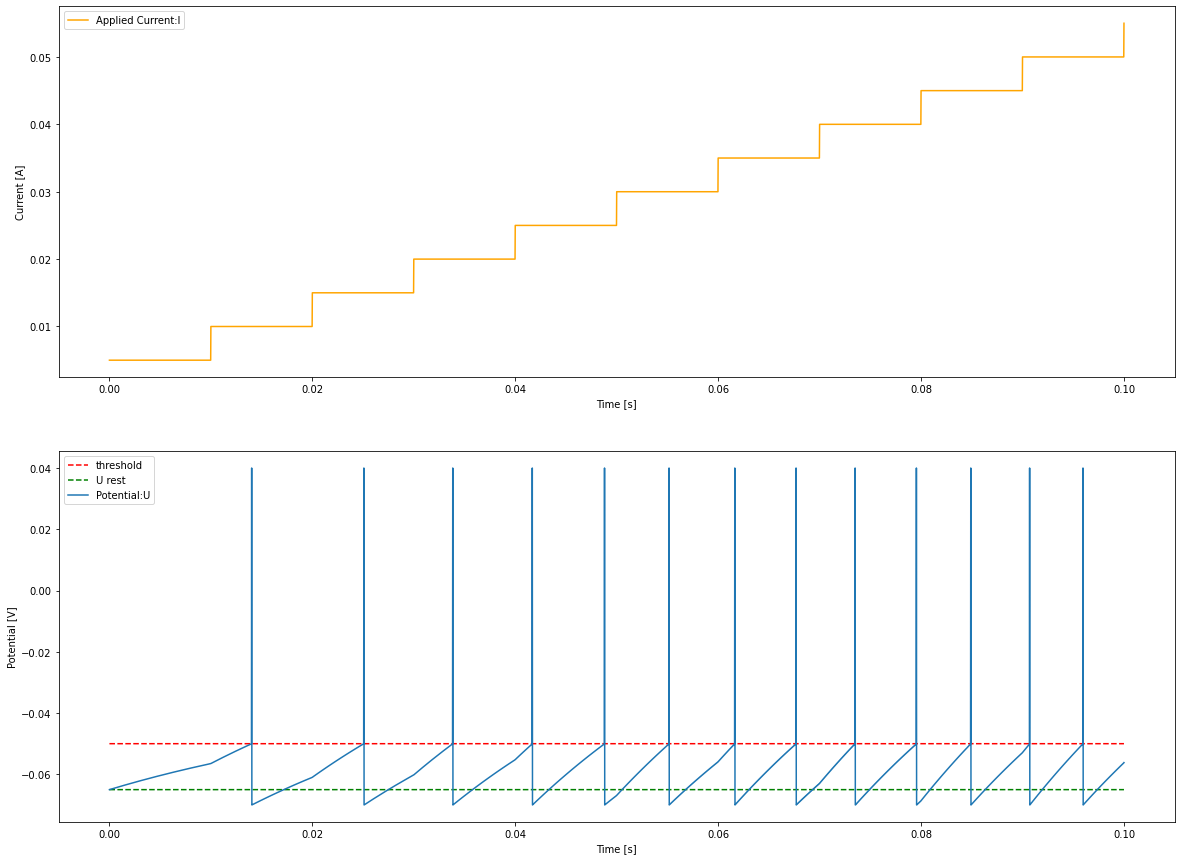

In [147]:
ALIF_model = ALIF(0.005, 4, 6, 0.005)
ALIF_model.plot()

## 6 - ALIF model with exponential function current

$U_{rest} = -0.65$

$U_{reset} = -0.70$

$U_{thereshold} = -0.50$

$I(t) = 0.005*e^{t/2000}+0.005$

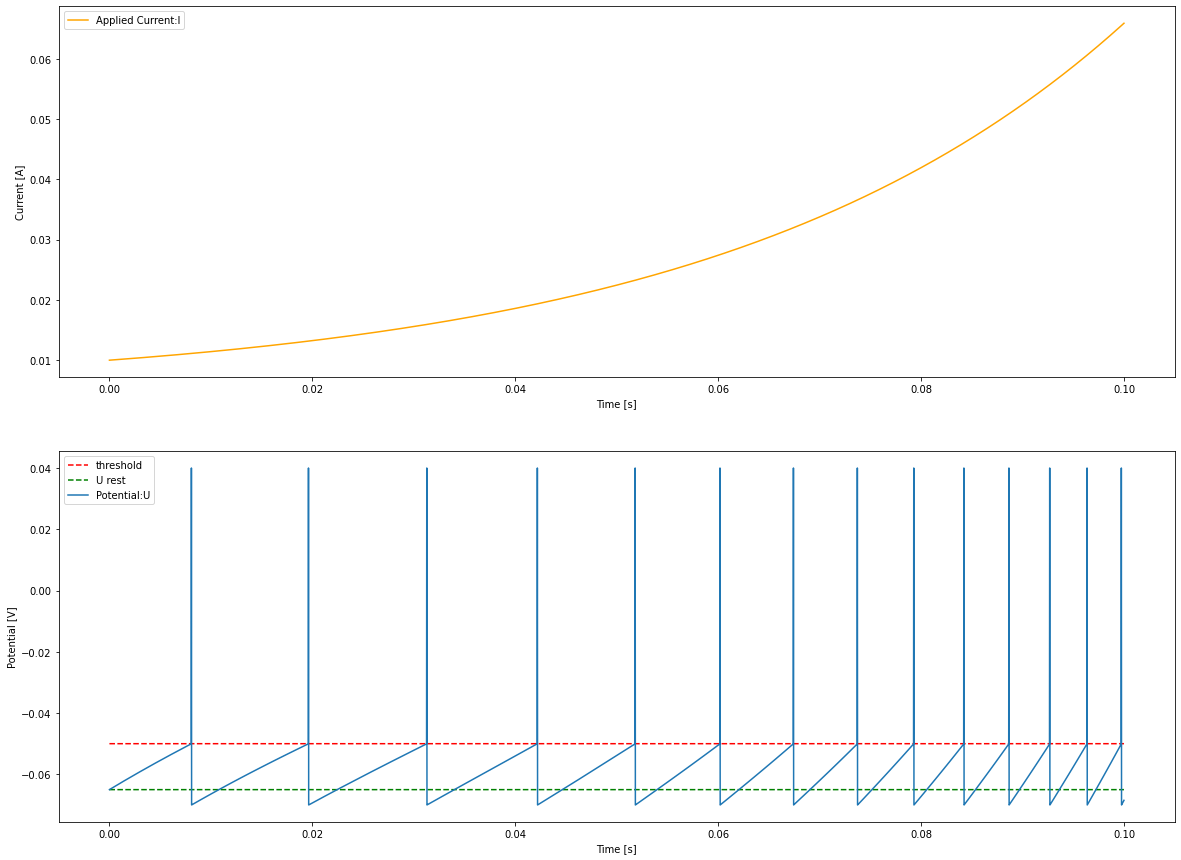

In [148]:
ALIF_model = ALIF(0.005, 5, 6, 0.005)
ALIF_model.plot()